In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tabulate import tabulate
import time

ModuleNotFoundError: No module named 'tabulate'

In [ ]:
def get_datos():
    datos=np.array(
        [[  2.01666708 ,  56.18031474], [  4.79734083 ,  47.18848199], [  9.23784581 ,  57.68974048], [ 14.11529384 ,  43.70348368],
         [ 14.92688637 ,  59.10244323], [ 17.34408196 ,  65.96080804], [ 17.62435324 ,  45.74334603], [ 22.41875021 ,  13.575581  ],
         [ 25.3139145  ,  68.43756969], [ 34.85886672 , 147.15375307], [ 38.87476262 ,  25.39687009], [ 42.01380169 ,  74.39010069],
         [ 46.63551059 ,  98.93395801], [ 49.58578273 , 116.07013679], [ 50.18371003 , 138.55546747], [ 52.06630172 , 139.36601894],
         [ 54.68810274 , 150.09622546], [ 57.13046193 , 156.14375739], [ 66.35609935 , 119.75844452], [ 69.05499042 , 139.08155228],
         [ 69.51252436 , 128.72247348], [ 69.83788756 , 152.65110462], [ 79.76649746 , 148.23106977], [ 81.83730552 , 137.86314926],
         [ 87.09879038 , 217.28932067], [ 89.00469759 , 168.64994509], [ 93.17139213 , 163.10598352], [ 93.66070686 , 200.47638924],
         [ 94.1944751  , 150.44019156], [ 97.36920633 , 173.2055957 ]])
 
    return datos

datos = np.array(get_datos())

gasto = datos[:, 0]
pib = datos[:, 1]

Paso 1:

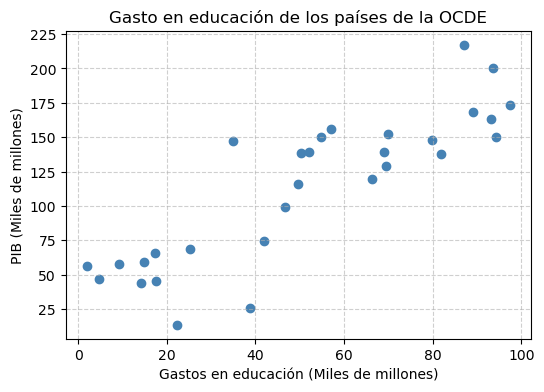

In [ ]:
# Crear la gráfica
plt.figure(figsize=(6, 4))
plt.scatter(gasto, pib, color='steelblue')

# Títulos y etiquetas
plt.title('Gasto en educación de los países de la OCDE')
plt.xlabel('Gastos en educación (Miles de millones)')
plt.ylabel('PIB (Miles de millones)')

# Cuadrícula
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar gráfica
plt.show()

Paso 2:

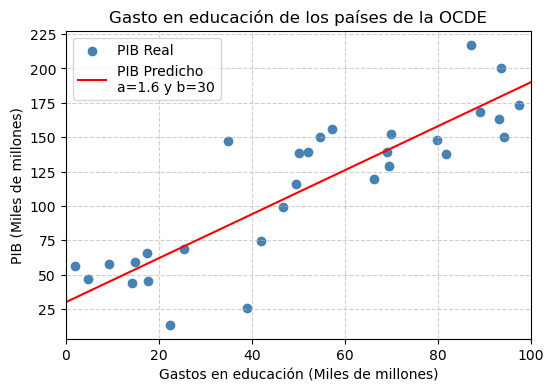

In [ ]:
a = 1.6
b = 30

x_line = np.linspace(0, 100, 100)

pib_predicho = a * x_line + b

# Crear la gráfica
plt.figure(figsize=(6, 4))
plt.scatter(gasto, pib, color='steelblue', label='PIB Real')
plt.plot(x_line, pib_predicho, color='red', label=f'PIB Predicho\na={a} y b={b}')

# Títulos y etiquetas
plt.title('Gasto en educación de los países de la OCDE')
plt.xlabel('Gastos en educación (Miles de millones)')
plt.ylabel('PIB (Miles de millones)')

# Cuadrícula y leyenda
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Mostrar
plt.xlim(0, 100)
plt.show()

Paso 3

/opt/miniconda3/envs/pia/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


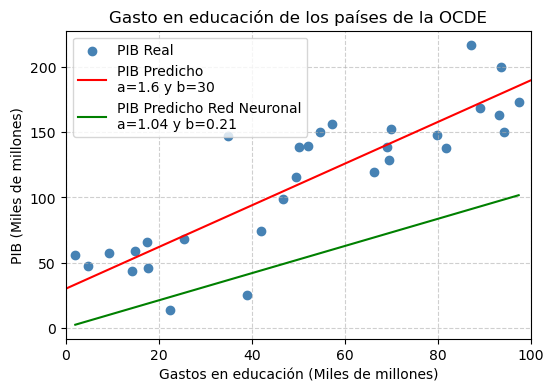

In [ ]:
# ---------------------------------------------------------------
# FUNCIÓN QUE CREA Y ENTRENA UN MODELO DE RED NEURONAL SENCILLA
# ---------------------------------------------------------------

def compile_fit(x, y, epochs):
    # Establecemos una "semilla" para que los resultados sean siempre iguales.
    # Esto sirve para controlar la aleatoriedad del entrenamiento.
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)

    # Creamos un modelo SECUENCIAL (las capas se añaden en orden, una tras otra)
    model = Sequential()

    # Añadimos una única capa con 1 neurona (Dense(1))
    # input_dim=1 significa que solo hay una variable de entrada (x)
    # Esta capa aprenderá una recta del tipo y = a*x + b
    model.add(Dense(1, input_dim=1))

    # Compilamos el modelo indicándole que mida el error con "mean_squared_error"
    # (Error cuadrático medio, una medida de qué tan mal predice el modelo)
    model.compile(loss='mean_squared_error')

    # Entrenamos el modelo con los datos (x, y)
    # epochs es el número de veces que verá los datos para aprender
    # verbose=False para que no muestre texto en pantalla
    history = model.fit(x, y, verbose=False, epochs=epochs)

    # Devolvemos el modelo entrenado y el historial del entrenamiento
    return model, history


# ---------------------------------------------------------------
# ENTRENAR EL MODELO
# ---------------------------------------------------------------

# Entrenamos la red neuronal con nuestros datos y 200 épocas
model, history = compile_fit(gasto, pib, 200)


# ---------------------------------------------------------------
# HACER PREDICCIONES CON EL MODELO ENTRENADO
# ---------------------------------------------------------------

# Predecimos los valores de y (PIB) para los mismos x (gasto en educación)
pib_pred = model.predict(gasto, verbose=False)

# Obtenemos los valores aprendidos por la neurona:
# model.layers[0].get_weights() devuelve [pesos, bias]
# peso (pendiente "a") está en [0][0,0]
# bias (intersección "b") está en [1][0]
a_pred_3 = model.layers[0].get_weights()[0][0, 0]
b_pred_3 = model.layers[0].get_weights()[1][0]


# ---------------------------------------------------------------
# CREAR LA GRÁFICA
# ---------------------------------------------------------------

plt.figure(figsize=(6, 4))  # Tamaño de la figura

# Puntos reales del PIB (azul)
plt.scatter(gasto, pib, color='steelblue', label='PIB Real')

# Línea roja: modelo teórico (la ecuación y = 1.6x + 30)
plt.plot(x_line, pib_predicho, color='red', label=f'PIB Predicho\na={a} y b={b}')

# Línea verde: predicción de la red neuronal entrenada
plt.plot(gasto, pib_pred, color='green', label=f'PIB Predicho Red Neuronal\na={a_pred_3:.2f} y b={b_pred_3:.2f}')


# ---------------------------------------------------------------
# DETALLES ESTÉTICOS DEL GRÁFICO
# ---------------------------------------------------------------

# Título y nombres de los ejes
plt.title('Gasto en educación de los países de la OCDE')
plt.xlabel('Gastos en educación (Miles de millones)')
plt.ylabel('PIB (Miles de millones)')

# Activar cuadrícula con líneas punteadas suaves
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la leyenda (explica qué significa cada color)
plt.legend()

# Mostrar la gráfica final en pantalla
plt.xlim(0, 100)
plt.show()

In [ ]:
# ---------------------------------------------------------------
# CÁLCULO DEL ERROR CUADRÁTICO MEDIO (MSE)
# ---------------------------------------------------------------

# Calculamos el error cuadrático medio
mse = np.sum((pib-pib_pred) ** 2)/len(pib)

# Imprimimos el resultado
print(f"Mean Squared Error (MSE) de la red neuronal: {mse:.4f}")

Mean Squared Error (MSE) de la red neuronal: 220898.2362


Pérdida final (última época): 3224.9644


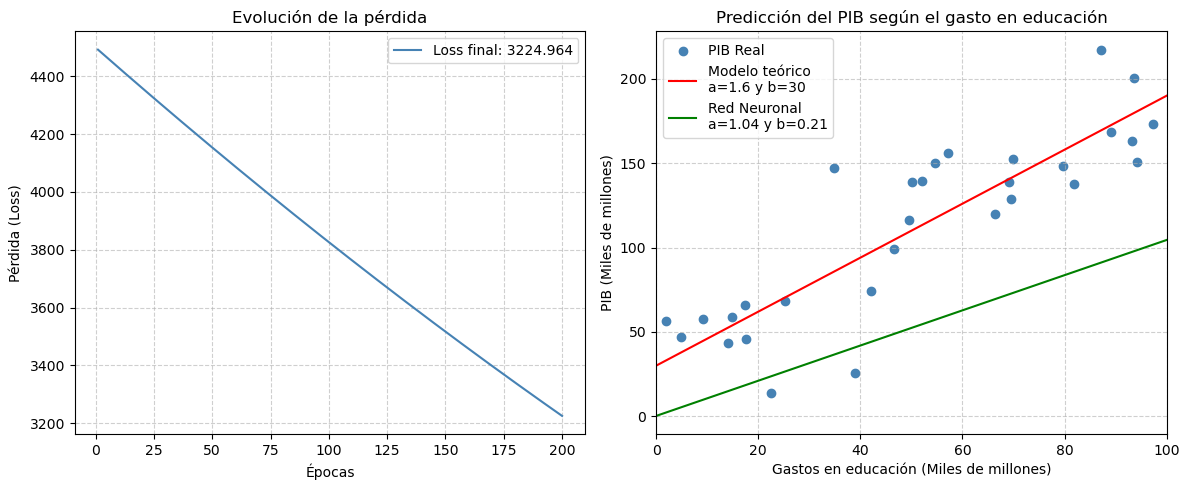

In [ ]:
# ---------------------------------------------------------------
# ENTRENAR EL MODELO Y REGISTRAR LA PÉRDIDA EN CADA ÉPOCA
# ---------------------------------------------------------------

# Número de épocas de entrenamiento
epochs = 200

# Entrenamos de nuevo el modelo (sin mostrar texto durante el entrenamiento)
history = model.fit(gasto, pib, verbose=False, epochs=epochs)

# Guardamos la lista de pérdidas por época
loss = history.history['loss']

# Valor final de la pérdida (última época)
loss_final = loss[-1]

# Mostramos la pérdida final
print(f"Pérdida final (última época): {loss_final:.4f}")

# ---------------------------------------------------------------
# GRÁFICAS COMBINADAS (Loss + Predicción)
# ---------------------------------------------------------------

plt.figure(figsize=(12, 5))
# ---------------------------------------------------------------
# GRÁFICA 1: Evolución del error (Loss)
# ---------------------------------------------------------------
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss, color='steelblue', label=f'Loss final: {loss_final:.3f}')
plt.title('Evolución de la pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# ---------------------------------------------------------------
# GRÁFICA 2: PIB Real vs Predicho
# ---------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.scatter(gasto, pib, color='steelblue', label='PIB Real')
plt.plot(x_line, pib_predicho, color='red', label=f'Modelo teórico\na={a} y b={b}')
plt.plot(
    np.linspace(0, 100, 50),
    a_pred_3 * np.linspace(0, 100, 50) + b_pred_3,
    color='green',
    label=f'Red Neuronal\na={a_pred_3:.2f} y b={b_pred_3:.2f}'
)
plt.title('Predicción del PIB según el gasto en educación')
plt.xlabel('Gastos en educación (Miles de millones)')
plt.ylabel('PIB (Miles de millones)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(0, 100)

# ---------------------------------------------------------------
# MOSTRAR LAS DOS GRÁFICAS
# ---------------------------------------------------------------
plt.tight_layout()
plt.show()

Paso 9

/opt/miniconda3/envs/pia/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


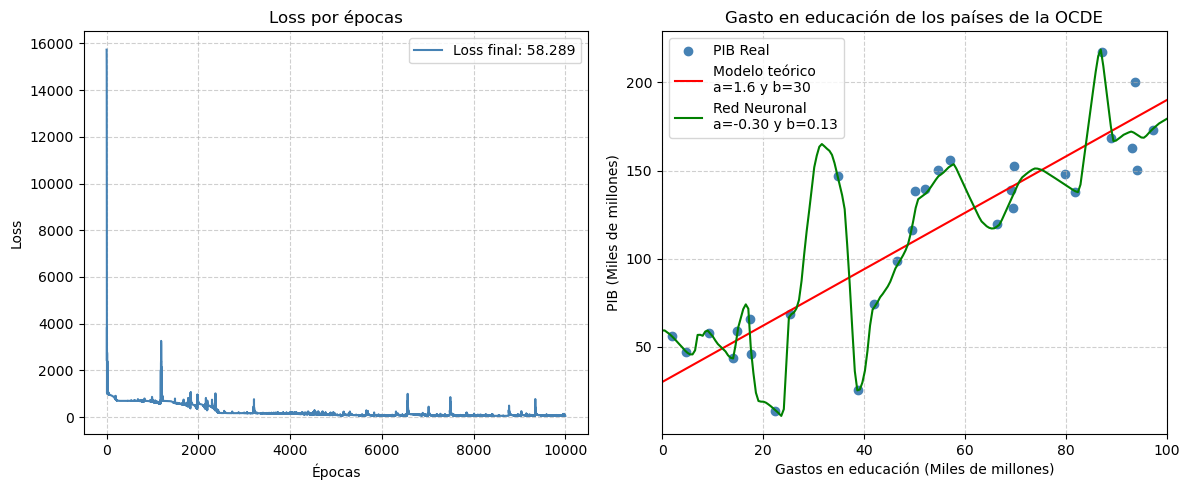

In [ ]:
def compile_fit(x,y,epochs):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)  
     
    model=Sequential()
    model.add(Dense(1,activation="relu",input_dim=1))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(300,activation="relu"))
    model.add(Dense(600,activation="relu"))
    model.add(Dense(900,activation="relu"))
    model.add(Dense(1800,activation="relu"))
    model.add(Dense(900,activation="relu"))   
    model.add(Dense(600,activation="relu"))        
    model.add(Dense(300,activation="relu"))        
    model.add(Dense(200,activation="relu"))
    model.add(Dense(100,activation="relu"))                    
    model.add(Dense(10,activation="relu"))                        
    model.add(Dense(1,input_dim=1))                        
    model.compile(loss='mean_squared_error',optimizer="Adam")
     
     
    history=model.fit(x, y,verbose=False, epochs=epochs) 
 
    return model,history

# ---------------------------------------------------------------
# ENTRENAMIENTO DEL MODELO COMPLEJO
# ---------------------------------------------------------------
epochs = 10000
model, history = compile_fit(gasto, pib, epochs)

# Guardamos el historial de pérdida
loss = history.history['loss']
loss_final = loss[-1]

# Obtenemos los pesos finales aprendidos (a y b)
a_pred_3 = model.layers[-1].get_weights()[0][0, 0]
b_pred_3 = model.layers[-1].get_weights()[1][0]

# Calculamos las predicciones de la red neuronal entrenada
x_line = np.linspace(0, 100, 200)
y_pred_nn = model.predict(x_line)

# ---------------------------------------------------------------
# GRÁFICAS COMBINADAS (Loss + Predicción)
# ---------------------------------------------------------------
plt.figure(figsize=(12, 5))

# ----------- GRÁFICA 1: Evolución de la pérdida -----------
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss, color='steelblue', label=f'Loss final: {loss_final:.3f}')
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# ----------- GRÁFICA 2: PIB Real vs Predicho -----------
plt.subplot(1, 2, 2)
plt.scatter(gasto, pib, color='steelblue', label='PIB Real')
plt.plot(x_line, a * x_line + b, color='red', label=f'Modelo teórico\na={a} y b={b}')
plt.plot(x_line, y_pred_nn, color='green', label=f'Red Neuronal\na={a_pred_3:.2f} y b={b_pred_3:.2f}')
plt.title('Gasto en educación de los países de la OCDE')
plt.xlabel('Gastos en educación (Miles de millones)')
plt.ylabel('PIB (Miles de millones)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(0, 100)

# Mostrar ambas
plt.tight_layout()
plt.show()